In [1]:
import cv2
import math
import random
import matplotlib.pyplot as plt
from skimage.io import imread

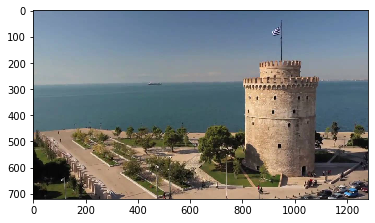

In [2]:
input_img_kmeans = cv2.imread("white-tower.png")
image = cv2.cvtColor(input_img_kmeans, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [3]:
def Cal_Dist(r1, g1, b1, r2, g2, b2):
    r = pow((float(r1)-float(r2)),2)
    g = pow((float(g1)-float(g2)),2)
    b = pow((float(b1)-float(b2)),2)
    dist = math.sqrt(r + g + b)
    return dist

In [6]:
def K_means(img, k):
#Getting 10 random pixels from the image and storing them into a list, these are initial center of the cluster
    ctr = []
    img_row, img_col = img.shape[0], img.shape[1]
   
    while len(ctr) < 10:
        x = random.randint(0, img_col - 1)
        y = random.randint(0, img_row - 1)

#Adding points(coordinate pair and its RGB value) to the list whos points are not in ctr
        if [x, y, img[y][x][2], img[y][x][1], img[y][x][0]] not in ctr:
            ctr.append([x, y, img[y][x][2], img[y][x][1], img[y][x][0]])
            
#Flag to indicate cluster  conversion
    Flag = False
    while(Flag == False):
        
        clust = []
        for i in range(k):
            clust.append([])

#initial distance btw data points and center are infinity
        for i in range(img_row):
            for j in range(img_col):
                dist = math.inf

#index to know which data points belongs to which cluster
                index = 0

#Checking the distance between data points and center
                for z in range(len(clust)):
                    center = ctr[z]
                    centerR, centerG, centerB = center[2], center[3], center[4]
#Getting the individual colors values for the pixel. OpenCV stores images as BGR by default
                    dataR, dataG, dataB = img[i][j][2], img[i][j][1], img[i][j][0]
                    cal_dist = Cal_Dist(centerR, centerG, centerB, dataR, dataG, dataB)

                    if cal_dist < dist:
                        dist = cal_dist
                        index = z
                        
#Adding the datapoints to the cluster which are closer to respective cluster
                clust[index].append([j, i, img[i][j][2], img[i][j][1], img[i][j][0]])

#updating new cluster ctr
        for i in range(len(clust)):
            cluster = clust[i]
            avgR, avgG, avgB = 0,0,0

#Finding the average of RGB points in the cluster
            for j in range(len(cluster)):
                avgR += cluster[j][2]
                avgG += cluster[j][3]
                avgB += cluster[j][4]

            avgR = int(avgR/len(cluster))
            avgG = int(avgG/len(cluster))
            avgB = int(avgB/len(cluster))
            
#updating ctr value if change else converged
            if avgR != ctr[i][2] or avgG != ctr[i][3] or avgB != ctr[i][4]:
                ctr[i][2] = avgR
                ctr[i][3] = avgG
                ctr[i][4] = avgB
            else:
                Flag = True

    # Segmented image to return
    output_img = img.copy()

#Representing each cluster with the average RGB value of its members  
    for z in range(len(clust)):
        cluster = clust[z]
        center = ctr[z]
        for data_points in cluster:
            output_img[data_points[1]][data_points[0]][2] = center[2] 
            output_img[data_points[1]][data_points[0]][1] = center[3] 
            output_img[data_points[1]][data_points[0]][0] = center[4] 

    return output_img

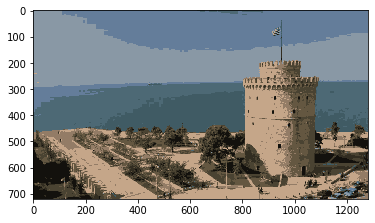

In [7]:
output_img_kmeans = K_means(input_img_kmeans, 10) #k=10
output_kmeans = cv2.cvtColor(output_img_kmeans, cv2.COLOR_BGR2RGB)
plt.imshow(output_kmeans)